# Bike sharing for tree regression

- [My tests]()
    - [Data preprocessing](#Data-Preprocesing)
    - [Data Dropped](#Drop-some-data-correlated-among-them)
    - [Lineal model](#Lineal-model)
    - [SVM model](#SVM-prediction)
    - [Tree](#Regresion-tree)
    - [Random Forest](#Random-Forest)
- [Tree model](Tree-model-with-sklearn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

# Data Preprocesing

I will check how the data behaves and see if there are high correlations among variables
- Comment: No outlayers work    

The variable to predict is: __cnt__

In [2]:
dataset = pd.read_csv("day.csv")

dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [3]:
print dataset.columns

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt'],
      dtype='object')


There are some variables correlated with the time as:

-  'dteday'
- 'season'
- 'yr'
- 'mnth'
- 'holiday'
- 'weekday' or 'workingday'

There are some weather variables:

- 'weathersit'-
- 'temp'
- 'atemp'
- 'hum',
- 'windspeed'
       
       
       

The variable to predict is the count:      

- 'cnt': total count of users
- 'casual' and 'registered' are the number of casual and registered users

In [4]:
dataset[['instant','dteday','season','yr','mnth','holiday','weekday', 'workingday','cnt']].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,cnt
0,1,2011-01-01,1,0,1,0,6,0,985
1,2,2011-01-02,1,0,1,0,0,0,801
2,3,2011-01-03,1,0,1,0,1,1,1349
3,4,2011-01-04,1,0,1,0,2,1,1562
4,5,2011-01-05,1,0,1,0,3,1,1600


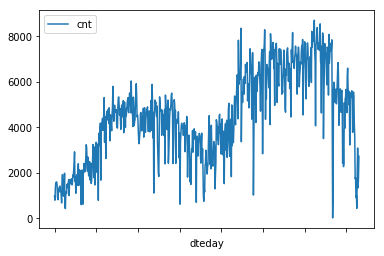

In [5]:
dataset.plot('dteday','cnt')


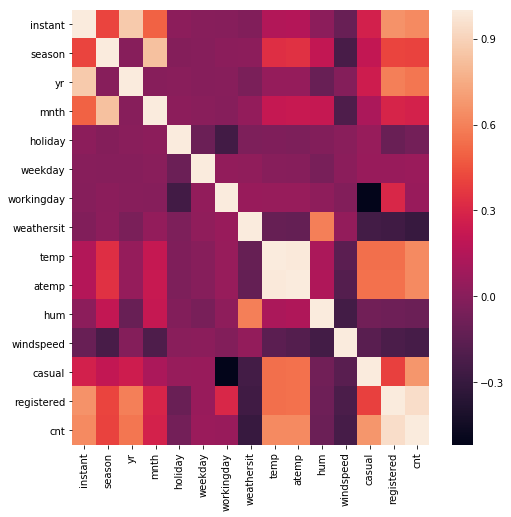

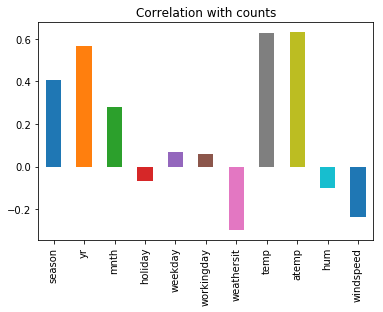

In [6]:
'''
#simplest way to compute the correlation matrix
import matplotlib.pyplot as plt

plt.matshow(dataset.corr())
'''
#using seaborn

corr = dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


# now I plot the correlations only with the count dropping the values which I see the highest correlations

plt.figure()

corr['cnt'].drop(['cnt','instant',u'casual', u'registered']).plot( kind='bar', title='Correlation with counts')


### Drop some data correlated among them
or not useful. The list is:

['instant',u'casual', u'registered', 'atemp']


In [7]:
print dataset.columns
new_dataset_df = dataset.drop(['dteday','yr','mnth','instant','atemp','casual', 'registered','cnt'], axis=1)

Index([u'instant', u'dteday', u'season', u'yr', u'mnth', u'holiday',
       u'weekday', u'workingday', u'weathersit', u'temp', u'atemp', u'hum',
       u'windspeed', u'casual', u'registered', u'cnt'],
      dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C2F4CC0>,
      dtype=object)

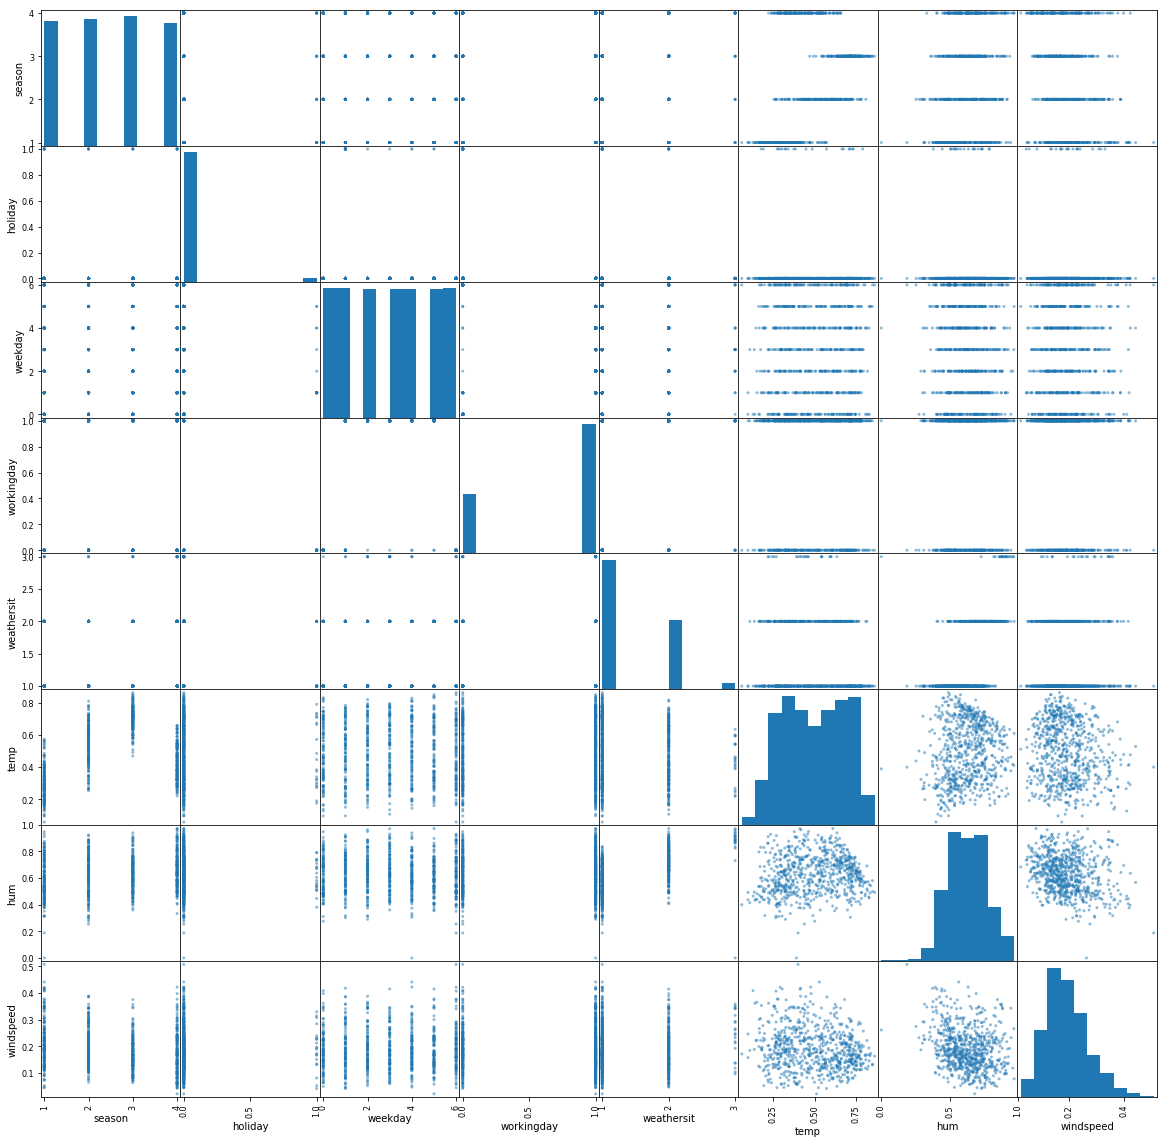

In [8]:
pd.plotting.scatter_matrix(new_dataset_df, figsize=(20,20))

season        0.205445
holiday      -0.015937
weekday      -0.052232
workingday    0.024327
weathersit    0.591045
temp          0.126963
hum           1.000000
windspeed    -0.248489
Name: hum, dtype: float64

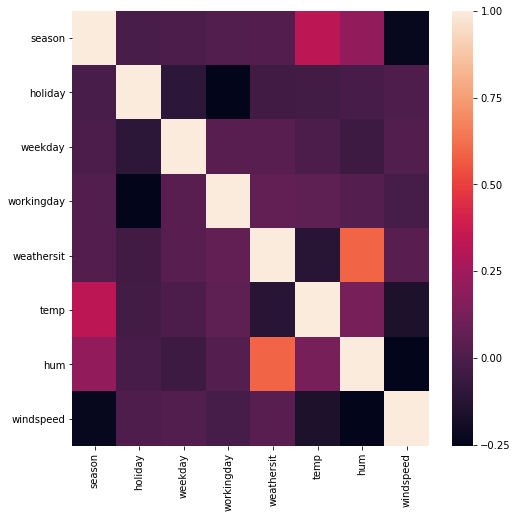

In [9]:
corr = new_dataset_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
corr['hum']

- humidity is higly correlated with weathersit. _What I should do?_
- Time variables correlated among them
- casual and registered shouldn't be useful as prediction variables, also _registered_ is almost _count_   



['yr','mnth','instant','atemp','casual', 'registered','cnt']

Even though I have canceled the year and temp, I have added later because 

# Applying models

Now that I have dropped several columns that are corelated among them, I will try to do predictions with the remaining data. The fact that all there are 8 variables doesn't mean all must be used.

The usable data is added to the dataframe *bikes_df* and there are variables to perform the prediction +  the variable to predict

In [10]:
bikes_df = new_dataset_df
bikes_df['cnt'] =dataset['cnt']
bikes_df['instant'] = dataset['instant']
bikes_df['yr'] = dataset['yr']

**Why have I added the year**    
I see that the number of counts increments from one year to another one. I believe this is an increment of people that are registered as users due to a popularization of the service or something similar.

**Should I detrend the dataset??**

In [11]:
print 'Are there  nan values? '+ str(bikes_df.isnull().values.any())

Are there  nan values? False


In [12]:
bikes_df.head(8)

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,instant,yr
0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1,0
1,1,0,0,0,2,0.363478,0.696087,0.248539,801,2,0
2,1,0,1,1,1,0.196364,0.437273,0.248309,1349,3,0
3,1,0,2,1,1,0.200000,0.590435,0.160296,1562,4,0
4,1,0,3,1,1,0.226957,0.436957,0.186900,1600,5,0
5,1,0,4,1,1,0.204348,0.518261,0.089565,1606,6,0
6,1,0,5,1,2,0.196522,0.498696,0.168726,1510,7,0
7,1,0,6,0,2,0.165000,0.535833,0.266804,959,8,0


**weekday info**: the day **0** is Sunday, so weekends are weekday={0,6}  
The data sets starts the _2011-01-01_


### Split the data

Split the data between train and test data

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    bikes_df.drop('cnt',axis=1), bikes_df['cnt'], test_size=0.33, random_state=42)

In [163]:
# order the indexs
X_train_s = X_train.sort_index()
X_test_s = X_test.sort_index()
y_train_s = y_train.sort_index()
y_test_s = y_test.sort_index()

In [164]:
len(X_train), len(X_test)

(489, 242)

In [165]:
X_test.head(8)

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,instant,yr
703,4,0,2,1,1,0.475833,0.733750,0.174129,704,1
33,1,0,4,1,1,0.186957,0.437826,0.277752,34,0
300,4,0,5,1,2,0.330833,0.585833,0.229479,301,0
456,2,0,0,0,2,0.425833,0.676250,0.172267,457,1
633,4,0,2,1,1,0.550000,0.570000,0.236321,634,1
557,3,0,3,1,1,0.716667,0.633333,0.151733,558,1
39,1,0,3,1,2,0.134783,0.494783,0.188839,40,0
356,1,0,5,1,1,0.373333,0.686250,0.274246,357,0


### Lineal model

Comment: No outlayers work

In [166]:
from sklearn import linear_model

In [167]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train.drop('instant', axis=1), y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error

print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test.drop('instant', axis=1)) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test.drop('instant', axis=1), y_test))


('Coefficients: \n', array([  411.9776602 ,  -527.93055443,    59.89805599,   137.1059868 ,
        -633.01903973,  5368.5449948 , -1020.03553178, -2523.2175761 ,
        1981.41755114]))
Mean squared error: 719792.87
Variance score: 0.81


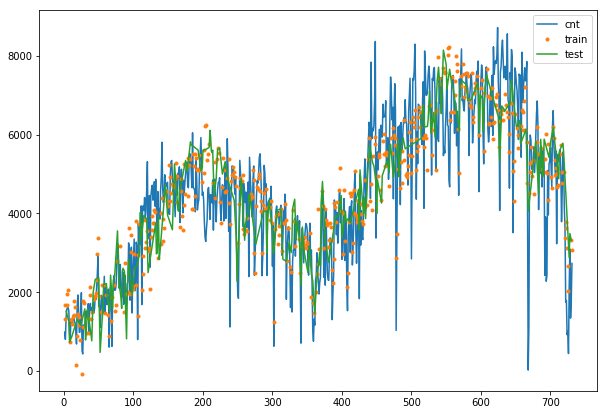

In [170]:
plt.figure(figsize=(10,7))
plt.plot(dataset['instant'],dataset['cnt'])

plt.plot(X_train['instant'],regr.predict(X_train.drop('instant', axis=1)), '.', label='train')
plt.plot(X_test_s['instant'],regr.predict(X_test_s.drop('instant', axis=1)), label='test')
plt.legend()

### SVM prediction

In [18]:
from sklearn import svm

In [19]:
clf = svm.SVR(kernel='rbf' , C=1000 ) #)
# train the model
clf.fit(X_train.drop('instant',axis=1), y_train)  

C:\Users\jose.gonzalez\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
# The coefficients
#print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((clf.predict(X_test.drop('instant', axis=1)) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(X_test.drop('instant', axis=1), y_test))


Mean squared error: 830005.50
Variance score: 0.79


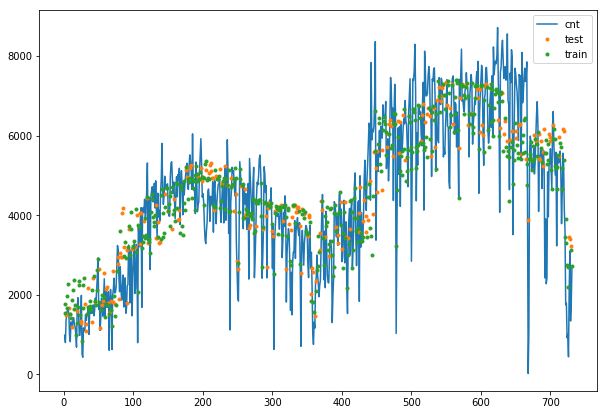

In [21]:
plt.figure(figsize=(10,7))
plt.plot(dataset['instant'],dataset['cnt'])
plt.plot(X_test['instant'],clf.predict(X_test.drop('instant', axis=1)), '.', label='test')
plt.plot(X_train['instant'],clf.predict(X_train.drop('instant', axis=1)), '.', label='train')
plt.legend()

# Regresion tree

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [171]:
tree_ = DecisionTreeRegressor() # random_state=42

In [172]:
X_train_d=X_train.drop('instant',axis=1)
X_test_d=X_test.drop('instant',axis=1)

In [173]:
np.mean(cross_val_score(tree_, (X_train_d), y_train, cv=10))
                   

0.6881335376224949

In [174]:
X_train_d.head()#

,season,holiday,weekday,workingday,weathersit,temp,hum,windspeed,yr
670,4,0,4,1,2,0.365833,0.581667,0.157346,1
677,4,0,4,1,1,0.352174,0.333478,0.347835,1
590,3,0,1,1,1,0.720833,0.545417,0.136212,1
547,3,0,0,0,1,0.815833,0.518750,0.168529,1
420,1,0,6,0,1,0.290833,0.395833,0.421642,1


In [175]:
tree_.fit(X_train_d,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [176]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((tree_.predict(X_test_d) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % tree.score(X_test_d, y_test))


Mean squared error: 778162.40


AttributeError: 'module' object has no attribute 'score'

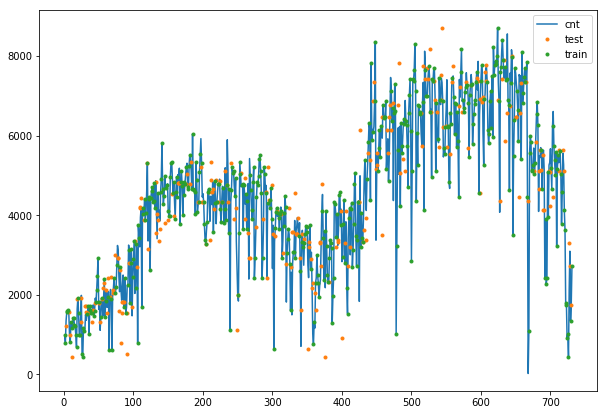

In [177]:
plt.figure(figsize=(10,7))
plt.plot(dataset['instant'],dataset['cnt'])
plt.plot(X_test['instant'],tree_.predict(X_test_d), '.', label='test')
plt.plot(X_train['instant'],tree_.predict(X_train_d), '.', label='train')
plt.legend()

Com es que tinc que utilizzar el 'instant' per que fassi una predicció optima?!?!  
Pot ser que al utilizzar l'index apren a differenciar entre el primer i el segon any en els quals hi ha un augment??

In [178]:
from sklearn import tree
import graphviz
tree.export_graphviz(tree_, out_file='dot_test.dot',feature_names = X_test_d.columns ,
                     filled=True, rounded=True,  
                     special_characters=True)
#export_graphviz(tree, out_file='dot_test')

El codigo previo crea un fichero *.dot* con la información del tree en la misma carpeta que se encuentra el notebook. De este modo, para transformar el fichero .dot en una imagen (png) se ejecuta en el terminal (de anaconda):

    dot -Tpng dot_test.dot -o tree.png
    
   
Esta información se encuentra en [scikit-learn export_graphviz page](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html)
Y se obtiene:  

<img src="tree.png">

Que aunque se vea pequeño, si se abre con el visor de imagenes se puede zoomar para ver todo bien

Ahora la pregunta es, ¿Se puede usar un randomForest?

# Random Forest

Remember that now there are the next data:

- X_train
- X_train_d: dropped the instant
- X_train_s: the X_train but with the index sorted

IT looks like that it is important to have the index not ordered since the algorithm might learn something wrong receiving the ordered data that by the fact of being ordered it is something that modifyes the restult

In [179]:
from sklearn.ensemble import RandomForestRegressor

In [180]:
regr = RandomForestRegressor(n_estimators=100,  random_state=0, max_depth=10)


In [181]:
np.mean(cross_val_score(regr, (X_train_d), y_train, cv=10))
                   

0.8338371229414717

In [182]:
regr.fit(X_train_d, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [183]:
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((regr.predict(X_test_d) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test_d, y_test))

Mean squared error: 428101.35
Variance score: 0.89


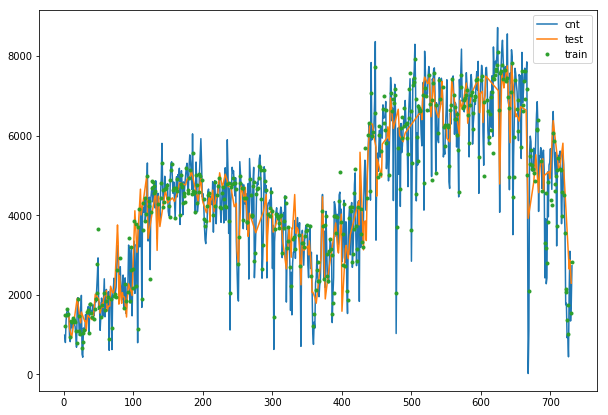

In [184]:
plt.figure(figsize=(10,7))
plt.plot(dataset['instant'],dataset['cnt'])
plt.plot(X_test_s['instant'],regr.predict(X_test_s.drop('instant', axis=1)),  label='test')
plt.plot(X_train['instant'],regr.predict(X_train_d), '.', label='train')
plt.legend()

## Tree model with sklearn

Using an example from the web

In [8]:
dataset = pd.read_csv("day.csv",usecols=['season','holiday','weekday','workingday','weathersit','cnt'])
dataset.sample(frac=1).head()

,season,holiday,weekday,workingday,weathersit,cnt
415,1,1,1,0,1,3129
186,3,0,3,1,1,4629
142,2,0,1,1,2,4274
723,1,0,1,1,2,920
640,4,0,2,1,3,4639


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
season        731 non-null int64
holiday       731 non-null int64
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
cnt           731 non-null int64
dtypes: int64(6)
memory usage: 34.3 KB


In [10]:
#Import the regression tree model
from sklearn.tree import DecisionTreeRegressor
#Parametrize the model
#We will use the mean squered error == varince as spliting criteria and set the minimum number
#of instances per leaf = 5
regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=5) 


In [11]:
"""
Create a training as well as a testing set
"""
def train_test_split(dataset):
    training_data = dataset.iloc[:int(0.7*len(dataset))].reset_index(drop=True)#We drop the index respectively relabel the index
    #starting form 0, because we do not want to run into errors regarding the row labels / indexes
    testing_data = dataset.iloc[int(0.7*len(dataset)):].reset_index(drop=True)
    return training_data,testing_data
training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

In [13]:
#Fit the model
regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
#Predict unseen query instances
predicted = regression_model.predict(testing_data.iloc[:,:-1])
#Compute and plot the RMSE
RMSE = np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted)**2)/len(testing_data.iloc[:,-1])))
RMSE

2360.6966567203835

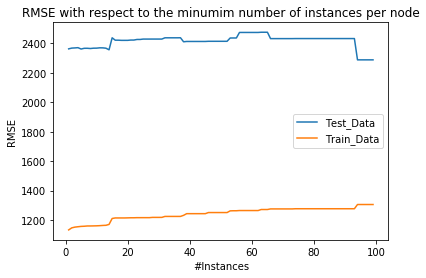

In [22]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
n_instances = 100
for i in range(1,n_instances):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(training_data.iloc[:,:-1],training_data.iloc[:,-1:])
    #Predict query instances
    predicted_train = regression_model.predict(training_data.iloc[:,:-1])
    predicted_test = regression_model.predict(testing_data.iloc[:,:-1])
    #Calculate and append the RMSEs
    RMSE_train.append(np.sqrt(np.sum(((training_data.iloc[:,-1]-predicted_train)**2)/len(training_data.iloc[:,-1]))))
    RMSE_test.append(np.sqrt(np.sum(((testing_data.iloc[:,-1]-predicted_test)**2)/len(testing_data.iloc[:,-1]))))
   
ax0.plot(range(1,n_instances),RMSE_test,label='Test_Data')
ax0.plot(range(1,n_instances),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

# split data

X_train, X_test, y_train, y_test = train_test_split(
    testing_data.iloc[:,:-1], testing_data.iloc[:,-1:], test_size=0.33, random_state=42)


In [28]:
#Fit the model
regression_model.fit(X_train,y_train)
#Predict unseen query instances
predicted = regression_model.predict(X_test)


In [78]:
#Compute RMSE
def RMSE(y_test, predicted):
    sm = np.sum(([float(i[0]) for i in y_test.values]-predicted)**2)
    #print sm, y_test.values[30][0], predicted[30],y_test.values[30][0]- predicted[30]
    RMSE = np.sqrt((sm)/float(len(y_test)))
    return RMSE

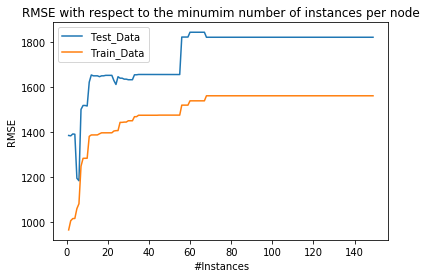

In [81]:
"""
Plot the RMSE with respect to the minimum number of instances
""" 

fig = plt.figure()
ax0 = fig.add_subplot(111) 
RMSE_train = []
RMSE_test = []
n_instances = 150
for i in range(1,n_instances):
    #Paramterize the model and let i be the number of minimum instances per leaf node
    regression_model = DecisionTreeRegressor(criterion="mse",min_samples_leaf=i)   
    #Train the model
    regression_model.fit(X_train,y_train)
    #Predict query instances
    predicted_train = regression_model.predict(X_train)
    predicted_test = regression_model.predict(X_test)
    #Calculate and append the RMSEs
    RMSE_train.append( RMSE(y_train, predicted_train))
    RMSE_test.append(RMSE(y_test, predicted_test))
   
ax0.plot(range(1,n_instances),RMSE_test,label='Test_Data')
ax0.plot(range(1,n_instances),RMSE_train,label='Train_Data')
ax0.legend()
ax0.set_title('RMSE with respect to the minumim number of instances per node')
ax0.set_xlabel('#Instances')
ax0.set_ylabel('RMSE')
plt.show()